In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.clean import Clean


immo_df = pd.read_csv('../data/cleaned/appended_data.csv')

immo_df = Clean().exclude_outliers(immo_df)

map = {
    'TO_RESTORE': 1,
    'TO_RENOVATE': 2,
    'TO_BE_DONE_UP': 3,
    'GOOD': 4,
    'JUST_RENOVATED': 5,
    'AS_NEW': 6
}
immo_df['State of Building'] = immo_df['State of Building'].apply(lambda x: map.get(x, np.NAN))

energy_ratings = {
    "G": 8,
    "F": 7,
    "E": 6,
    "D": 5,
    "C": 4,
    "B": 3,
    "A": 2,
    "A+": 1,
    "A++": 0
}
immo_df['EPC'] = immo_df['EPC'].apply(lambda x: energy_ratings.get(x, np.NAN))
kitchen_types={
    "NOT_INSTALLED": 0,
    "USA_UNINSTALLED": 0,
    "SEMI_EQUIPPED": 1,
    "USA_SEMI_EQUIPPED": 1,
    "INSTALLED": 2,
    "USA_INSTALLED": 2,
    "HYPER_EQUIPPED": 3,
    "USA_HYPER_EQUIPPED": 3,
}
immo_df['Kitchen Type'] = immo_df['Kitchen Type'].apply(lambda x: kitchen_types.get(x, np.NAN))

# prevent print of data frame trunking
pd.set_option('display.max_columns', None)
subset = immo_df.loc[:,['EPC', 'State of Building', 'Kitchen Type']]

common_columns = ['Price', 'Room Count', 'Habitable Surface', 'Build Year', "Kitchen Type", 'EPC', 'Consumption Per m2','State of Building', "Kitchen Surface"]
house_only_columns = ["Facades", 'Land Surface', ]
appartment_only_columns = ["Terrace Surface", ]
house_columns = common_columns + house_only_columns
appartment_columns = common_columns + appartment_only_columns

immo_df = Clean.exclude_outliers(immo_df)

dropping fireplace count column


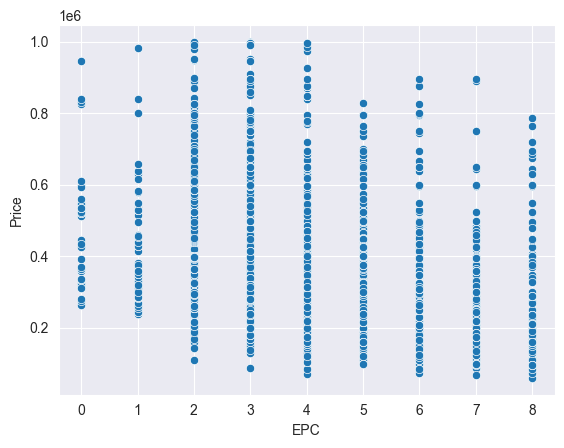

In [2]:
# scatter plot epc price
sns.scatterplot(data=immo_df, x='EPC', y='Price')
plt.show()

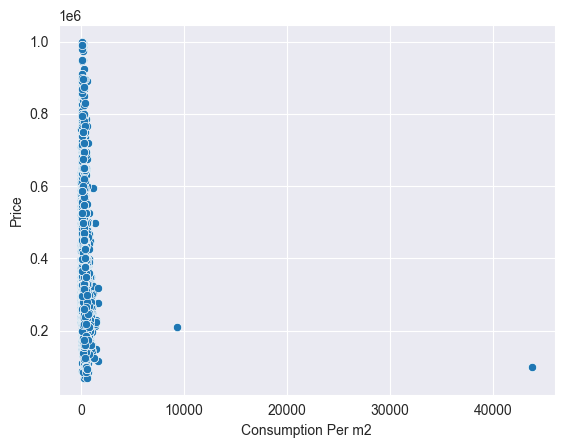

In [4]:
# scatter plot cunsumtpion /m2 price
sns.scatterplot(data=immo_df, x='Consumption Per m2', y='Price')
plt.show()

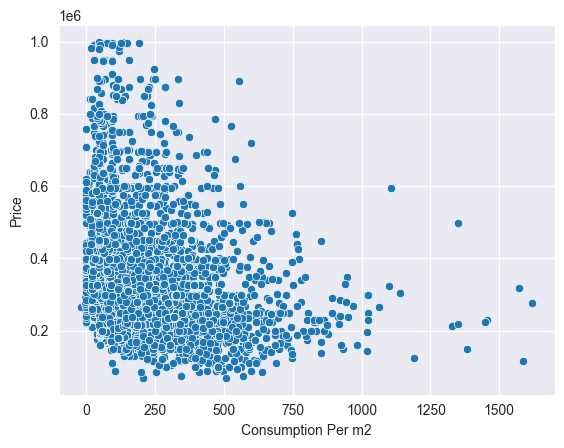

In [5]:
# remove outliers
immo_df = immo_df[immo_df['Consumption Per m2'] < 2000]
# scatter plot cunsumtpion /m2 price
sns.scatterplot(data=immo_df, x='Consumption Per m2', y='Price')
plt.show()